In [2]:
# Import preliminary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Review the data
data = pd.read_csv('datasets/exams.csv')

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [3]:
# Check data  info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
# Check data for missing values
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
# Visualize the data's distribution
import seaborn as sns
columns = ['race/ethnicity','math score','reading score','writing score']
for col in columns:
    fig, ax = plt.subplots(figsize=(4,8))
    ax.hist(data[col])
    ax.set_xlabel(col)
    ax.set_ylabel("Frequnecy")
    ax.set_title(f"Histogram  for {col}")
    plt.show()

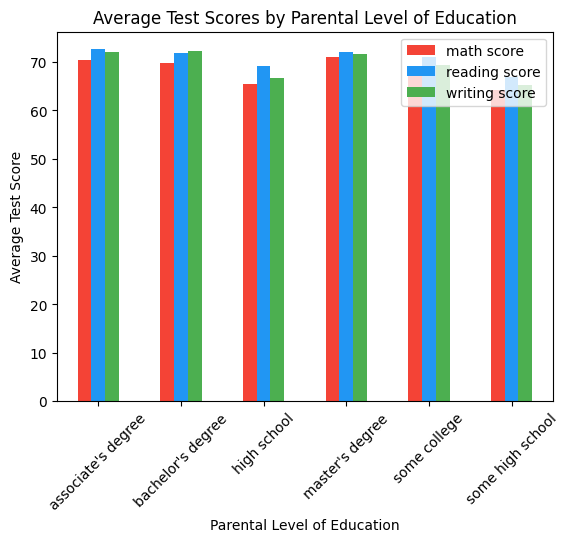

In [60]:
# Check the impact of parental level of eduaction on varies test scores
tests = ['math score','reading score','writing score']
grouped_parents = data.groupby('parental level of education')[tests].mean()

# specify the colors for each test
colors = ['#f44336', '#2196f3', '#4caf50']

# plot the grouped data with custom colors
ax = grouped_parents.plot(kind='bar', color=colors)
ax.set_title('Average Test Scores by Parental Level of Education')
ax.set_xlabel('Parental Level of Education')
ax.set_ylabel('Average Test Score')
plt.xticks(rotation=45)
plt.show()